## **Text Feature Engineering and Modelling**
Done by Wong Wen Bing 230436M

In [9]:
#pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import nltk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
df=pd.read_csv('230436M_cleaned_data.csv')
df.head()

,Unnamed: 0,index,description,species,text_length,cleaned_text
0,0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,junthe javan myna shares some similarities wi...
1,1,1,Click here for more information about the Red ...,Collared Kingfisher,398,click here for more information about the red ...
2,2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,the blackheaded orioleoriolus larvatus is a sp...
3,3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search from thousands of royaltyfree javan myn...
4,4,4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recordings andbackground recordings...


In [12]:
y=df['species']
x=df['cleaned_text']

In [13]:
display(x.shape)
display(y.shape)

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

(611,)

(611,)

Feature Engineering




In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (488, 3414)
test: (123, 3414)

features: ['abilities' 'ability' 'able' ... 'zestimate' 'zhao' 'zoonoses']
      


## Modelling
There will be a number of models tested.

1. Logistic Regression
2. Naives Bayes
3. Support Vector Machine

### **Model 1: Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Black-naped Oriole', 'Collared Kingfisher',
       'Little Egret', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Little Egret', 'Collared Kingfisher',
       'Javan Myna', 'Black-naped Oriole', 'Collared Kingfisher',
       'Javan Myna', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Collared Kingfisher', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Javan Myna', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Collared Kingfisher', 'Javan Myna',
       'Javan Myna', 'Javan Myna', 'Collared Kingfisher', 'Little Egret',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Black-naped Oriole', 'Little Egret', 'Javan Myna',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Collared Kingfisher',
       'Co

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[36,  0,  0,  0],
       [ 3, 26,  0,  1],
       [ 1,  0, 32,  0],
       [ 7,  0,  0, 17]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.77      1.00      0.87        36
Collared Kingfisher       1.00      0.87      0.93        30
         Javan Myna       1.00      0.97      0.98        33
       Little Egret       0.94      0.71      0.81        24

           accuracy                           0.90       123
          macro avg       0.93      0.89      0.90       123
       weighted avg       0.92      0.90      0.90       123



### **Model 2: Naives Bayes**

In [18]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[36,  0,  0,  0],
       [ 3, 27,  0,  0],
       [ 1,  1, 31,  0],
       [ 9,  1,  0, 14]], dtype=int64)

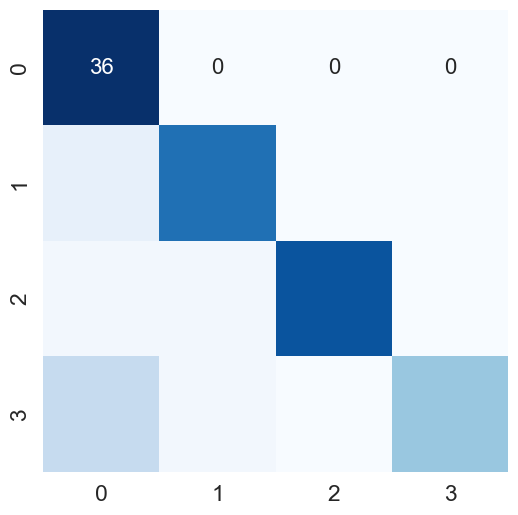

In [22]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(4), range(4))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Ploting the confusion matrix
conf_matrix(y_test, y_pred_cv)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.73      1.00      0.85        36
Collared Kingfisher       0.93      0.90      0.92        30
         Javan Myna       1.00      0.94      0.97        33
       Little Egret       1.00      0.58      0.74        24

           accuracy                           0.88       123
          macro avg       0.92      0.86      0.87       123
       weighted avg       0.91      0.88      0.87       123



Support Vector Machine


In [24]:
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)

C:\Users\wongw\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[35,  0,  1,  0],
       [ 2, 26,  0,  2],
       [ 1,  0, 32,  0],
       [ 3,  0,  1, 20]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
svm_results = classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret'])